# QOSF Mentorship Program: Screening Task

### Name: Tanya Garg

Hi! Here I present my take on TASK 3

## Task 3:

Implementation of a quantum circuit simulator. It is expected that the simulator can perform the following:
 
 - Initialize state
 - Read Program, and for each gate: 
     <br>- Calculate matrix operator
     <br>- Apply Operator (modify state)
     
 - Perform multi-shot measurement of all qubits using weighted random technique
 
**Bonus**: Construct variational gates and allow global parameters to implement variational quantum algorithms


## Solution:

### Step 1: Importing the required libraries:

In [1]:
# Here we import all the libraries which will be used to construct the quantum simulator
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import math
import cmath

np.set_printoptions(suppress=True)

### Step 2: State vector and Initialization:

A quantum state can be represented in the vector form. A qubit is the basic unit of quantum computing and is a two level quantum state i.e. it has two orthonormal basis states. 

An orthonormal basis is a set H where each basis vector v $\in$ H has a unit length and is perpendicular to all the other vectors:

$$
\langle \psi_{a} | \psi_{b} \rangle = \delta_{ab}
$$

where $\delta_{ab}$ is the Delta Dirac function.

The most commonly used basis states or the computation basis are the $|0\rangle$ and $|1\rangle$ states with vector notations:

$$
|0\rangle=\left[ \begin{array}{cc}
1 \\
0
\end{array} \right]\hspace{0.2in}
%  
|1\rangle=\left[ \begin{array}{cc}
0 \\
1
\end{array} \right]\hspace{0.2in}
$$

The general state of a qubit can thus be represented as

$$
|\psi\rangle= \alpha|0\rangle + \beta|1\rangle = \left[ \begin{array}{cc}
\alpha \\
\beta
\end{array} \right]\hspace{0.2in}
$$

where $\alpha\alpha^* + \beta\beta^*=1 $

The combined state vector for multiple qubits is computed by taking the tensor product between the state vectors of individual qubits:

$$
|\psi_{a}\rangle \otimes |\psi_{b}\rangle = \alpha_{1}|00\rangle + \alpha_{2}|01\rangle + \alpha_{3}|10\rangle + \alpha_{4}|11\rangle = \left[ \begin{array}{cc}
\alpha_{1} \\
\alpha_{2} \\
\alpha_{3} \\
\alpha_{4} 
\end{array} \right]\hspace{0.2in}
$$

In this simulator, we will be using the computational basis with the default initialization of |000...n times> for n qubits

In [2]:
def initialize(n, coef=[1]):
    
        """
        The function computes and returns the initial state of the qubits.
        Arguments: Number of qubits, coeffient of each state

        To initialize a custom state: initialize(n,[list of coeff])
        Default: If no coef are provided, the qubit is initialized in the |000...n times> state

        """

        state = np.zeros(2**n)
        state = np.array([state])
        state = state.T

        if len(coef)==1:
            
            state[0] = 1
            return state

        else:
            
            for i in range(2**n):
                
                state[i] = coef[i] 

            return state

Let's go through an example of intialization:

In [3]:
# Let the number of qubits taken be 3
n = 3

# Example 1: Default initialization
q = initialize(n)
print("Default state:\n",q.T)


# Example 2: Custom initialization
q = initialize(n,[0, 1/math.sqrt(3), 0, math.sqrt(2/3), 0, 0, 0, 0])
print("\nCustom state:\n",q.T)

Default state:
 [[1. 0. 0. 0. 0. 0. 0. 0.]]

Custom state:
 [[0.         0.57735027 0.         0.81649658 0.         0.
  0.         0.        ]]


### Step 3: Quantum Gates and operators:

Quantum gates are unitary matrices and act as operators on the state vector. They change the direction of the state vector in the Hilbert space and thus are responsible for the evolution of the quantum state.

Some of the commonly used single qubit gates are:

**X-Gate:**

The X-gate is equivalent to the NOT gate in classical computation. It flips the $|0\rangle$ state to the $|1\rangle$ state and vice-versa. It is thus a half rotation about the X axis on the Bloch sphere:

$$
X\left[ \begin{array}{cc}
1 \\
0
\end{array} \right]=\left[ \begin{array}{cc}
0 \\
1
\end{array} \right]\hspace{0.2in}
$$

$$
X\left[ \begin{array}{cc}
0 \\
1
\end{array} \right]=\left[ \begin{array}{cc}
1 \\
0
\end{array} \right]\hspace{0.2in}
$$

Therefore the X-gate can be represented as:

$$
X=\left[ \begin{array}{cc}
0 & 1 \\
1 & 0
\end{array} \right]
$$

Where the first row gives the result for the $|0\rangle$ state and the second row gives the result for the $|1\rangle$ state

In [4]:
def X():
    
        """
        The function return a Pauli-X unitary gate matrix to be applied to the circuit

        To add a Pauli X gate and apply on n qubits: { "gate": "X", "target": [n1,n2,n3....nn] }

        """

        operator = np.array([[0, 1], [1, 0]])

        return operator

In [5]:
# Example: X-Gate
q = initialize(1)
x = X()

q_final = np.dot(x,q)

print("X-gate unitary matrix:\n",x)
print("\nState after transition:\n",q_final.T)

X-gate unitary matrix:
 [[0 1]
 [1 0]]

State after transition:
 [[0. 1.]]


**Z-Gate:**

The Z-gate is a phase gate . It does not have any affect on the $|0\rangle$ state and flips the sign of the $|1\rangle$ state. It is thus a half rotation about the Z axis on the Bloch sphere:

$$
Z\left[ \begin{array}{cc}
1 \\
0
\end{array} \right]=\left[ \begin{array}{cc}
1 \\
0
\end{array} \right]\hspace{0.2in}
$$

$$
Z\left[ \begin{array}{cc}
0 \\
1
\end{array} \right]=-\left[ \begin{array}{cc}
0 \\
1
\end{array} \right]\hspace{0.2in}
$$

Therefore the Z-gate can be represented as:

$$
Z=\left[ \begin{array}{cc}
1 & 0 \\
0 & -1
\end{array} \right]
$$

The simulator has in-built Y, Z, Ha, S, Sdag, T, Tdag and I unparameterized single qubit gates

In [6]:
def Y():
    
        """
        The function return a Pauli-Y unitary gate matrix to be applied to the circuit

        To add a Pauli Y gate and apply on n qubits: { "gate": "Y", "target": [n1,n2,n3....nn] }

        """

        operator = np.array([[0, -1j],
                             [1j, 0]])

        return operator

    
def Z():
    
        """
        The function return a Pauli-Z unitary gate matrix to be applied to the circuit

        To add a Pauli Z gate and apply on n qubits: { "gate": "Z", "target": [n1,n2,n3....nn] }

        """

        operator = np.array([[1, 0],
                             [0, -1]])
        
        return operator
    
def Ha():
    
        """
        The function return a Hadamard unitary gate matrix to be applied to the circuit

        To add a Hadamard gate and apply on n qubits: { "gate": "Ha", "target": [n1,n2,n3....nn] }


        """

        operator = np.array([[1, 1], [1, -1]])
        operator = operator/math.sqrt(2)
        
        return operator
    
def S():
    
        """
        The function return a Phase(S) unitary gate matrix to be applied to the circuit

        To add an S gate and apply on n qubits: { "gate": "S", "target": [n1,n2,n3....nn] }

        """

        operator = np.array([[1, 0],
                             [0, -1j]])
        
        return operator
    
def Sdag():
    
        """
        The function return a Phase(S†) unitary gate matrix to be applied to the circuit

        To add an Sdag gate and apply on n qubits: { "gate": "Sdag", "target": [n1,n2,n3....nn] }

        """

        operator = np.array([[1, 0],
                             [0, 1j]])
        
        return operator
    
def T():
    
        """
        The function return a 𝝅/8(T) unitary gate matrix to be applied to the circuit

        To add a T gate and apply on n qubits: { "gate": "T", "target": [n1,n2,n3....nn] }

        """

        operator = np.array([[1, 0],
                             [0, cmath.exp(1j*np.pi/4)]])
        
        return operator
    
def Tdag():
    
        """
        The function return a 𝝅/8(T†) unitary gate matrix to be applied to the circuit

        To add a Tdag gate and apply on n qubits: { "gate": "Tdag", "target": [n1,n2,n3....nn] }

        """

        operator = np.array([[1, 0],
                             [0, cmath.exp(-1j*np.pi/4)]])
        
        return operator
    
def I():
    
        """
        The function return an Identity unitary gate matrix to be applied to the circuit

        To add an I gate and apply on n qubits: { "gate": "I", "target": [n1,n2,n3....nn] }

        """

        operator = np.array([[1, 0],
                             [0, 1]])
        
        return operator
    

In [7]:
# Example: Unparameterized Single Qubit Gates
q = initialize(1, [0, 1])
x = X()
z = Z()
h = Ha()

# Application of Z-gate:
q_final = np.dot(z,q)

print("State after applying Z:\n",q_final.T)


# Application of H-gate:
q_final = np.dot(h,q)

print("\nState after applying Ha:\n",q_final.T)

# Application of HXH:
op = np.matmul(x,h)
op = np.matmul(h,op)
q_final = np.dot(op,q)

print("\nState after applying HaXHa:\n",q_final.T)

State after applying Z:
 [[ 0. -1.]]

State after applying Ha:
 [[ 0.70710678 -0.70710678]]

State after applying HaXHa:
 [[ 0. -1.]]


### Parametric Single Qubit Gates:

There are a set of more general single qubit gates which are parameterized in nature. A subset of these gates allow us to rotate our quantum state vector through a particular angle $\theta$ about the axis of our choice. These gates are the $R_{x}, R_{y}$ and $R_{z}$ gates. The matrix operator of these gates is:

$$
R_{A}=\exp(\frac{-iA\theta}{2})= cos(\theta/2)-isin(\theta/2)A
$$

Therefore, for A = X :
$$
R_{x}=\left[ \begin{array}{cc}
cos(\frac{\theta}{2}) & -isin(\frac{\theta}{2}) \\
-isin(\frac{\theta}{2})  & cos(\frac{\theta}{2})
\end{array} \right]
$$

The simulator supports $R_{x}, R_{y}$ and $R_{z}$ gates

In [8]:
def RX(params):
    
        """
        The function return an Rx(Rotation about X) unitary gate matrix to be applied to the circuit
        Arguments: Value of parameter theta (dict)

        To add an Rx and apply on n qubits: { "gate": "RX", "params":{"theta": x}, target": [n1,n2,n3....nn] }
        
        """
        
        operator = [["__import__('math').cos(theta/2)", "-1j*__import__('math').sin(theta/2)"],
                     ["-1j*__import__('math').sin(theta/2)", "__import__('math').cos(theta/2)"]]
        
        for i in range(2):
            
            for j in range(2): 

                operator[i][j] = eval(operator[i][j],params)

        operator = np.array(operator)
        
        return operator
    
    
def RY(params):
    
        """
        The function return an Ry(Rotation about Y) unitary gate matrix to be applied to the circuit
        Arguments: Value of parameter theta (dict)

        To add an Ry and apply on n qubits: { "gate": "RY", "params":{"theta": y}, target": [n1,n2,n3....nn] }
        
        """
        
        operator = [["__import__('math').cos(theta/2)", "-1*__import__('math').sin(theta/2)"],
                     ["__import__('math').sin(theta/2)", "__import__('math').cos(theta/2)"]]
        
        for i in range(2):
            
            for j in range(2): 

                operator[i][j] = eval(operator[i][j],params)

        operator = np.array(operator)
        
        return operator
    
    
    
def RZ(params):
    
        """
        The function return an Rz(Rotation about Z) unitary gate matrix to be applied to the circuit
        Arguments: Value of parameter theta (dict)

        To add an Rz and apply on n qubits: { "gate": "RZ", "params":{"theta": z}, target": [n1,n2,n3....nn] }
        
        """
        
        operator = [["__import__('cmath').exp(-1j*theta/2)", "0"],
                     ["0", "__import__('cmath').exp(1j*theta/2)"]]
        
        for i in range(2):
            
            for j in range(2): 

                operator[i][j] = eval(operator[i][j],params)

        operator = np.array(operator)
        
        return operator

In [9]:
# Example: Parametric Rotation gates
q = initialize(1)
params1 = {"theta": np.pi}
params2 = {"theta": np.pi/2}
rx = RX(params1)
ry = RY(params2)


# Rotation about X by 180 degrees
q_final = np.dot(rx,q)

print("State after applying RX(pi):\n",q_final.T)


# Rotation about Y by 90 degrees
q_final = np.dot(ry,q)

print("\nState after applying RY(pi/2):\n",q_final.T)


State after applying RX(pi):
 [[0.+0.j 0.-1.j]]

State after applying RY(pi/2):
 [[0.70710678 0.70710678]]


Single qubit-gates can be derived from a general unitary gate U3 by varrying the parameters $\theta$, $\lambda$ and $\phi$ of the unitary matrix:

$$
U3=\left[ \begin{array}{cc}
cos(\frac{\theta}{2}) & -e^{i\lambda}sin(\frac{\theta}{2}) \\
e^{i\phi}sin(\frac{\theta}{2})  & e^{i(\lambda+\phi)}cos(\frac{\theta}{2})
\end{array} \right]
$$

In [10]:
def U3(params):
    
        """
        The function return a U3(Generalised single qubit gate) unitary gate matrix to be applied to the circuit
        Arguments: Value of parameter theta, lambda, phi (dict)

        To add a U3 and apply on n qubits: { "gate": "U3", "params":{"theta": t, "l": l, "phi": p}, target": [n1,n2,n3....nn] }
        
        """
        
        operator = [["__import__('math').cos(theta/2)", 
                     "-1*__import__('cmath').exp(1j*l)*__import__('math').sin(theta/2)"],
                     ["__import__('cmath').exp(1j*phi)*__import__('math').sin(theta/2)", 
                      "__import__('cmath').exp(1j*(phi+l)/2)*__import__('math').cos(theta/2)"]]
        
        for i in range(2):
            
            for j in range(2): 

                operator[i][j] = eval(operator[i][j],params)

        operator = np.array(operator)
        
        return operator

In [11]:
# Example: General single qubit gate
q = initialize(1)
params = {"theta": np.pi, "l": np.pi/2, "phi": -np.pi/2}
u = U3(params)


# Application of U3
q_final = np.dot(u,q)

print("State after applying U3:\n",q_final.T)

State after applying U3:
 [[0.+0.j 0.-1.j]]


To enable the use of the simulator for variational quantum algorithms, an important feature is that of global parameters. This allows us to vary the values of the paramteres of the parametric gates in different iterations. 

One can declare the values of the parameters as an arbitrary variable global_1 which can be later substituted when the circuit is run.

In [12]:
def global_params_sub(params, global_params = 0):
    
        """
        The function substitutes the values of the global_params in place of the variables 
        in the params for the parametric gates and returns the updated dictionary.
        Arguments: Parameters of the parametric gates(dict), Values of global parameters(dict)
        
        """
        
        if global_params == 0:
            
            return params
        
        for key,value in params.items():
            
             if type(value) == str:
        
                 for i,j in global_params.items():
                
                    value = value.replace(i,str(j))
                    params[key] = value

             params[key] = float(params[key])
            
        return params

In [13]:
# Example: Global Parameters
q = initialize(1,[0, 1])
params = {"theta": np.pi, "l": "global_1", "phi": "global_2"}
global_params = {"global_1": 0, "global_2": np.pi}

params_updated = global_params_sub(params, global_params)
u = U3(params_updated)


# Application of U3
q_final = np.dot(u,q)

print("State after applying U3:\n",q_final.T)

State after applying U3:
 [[-1.+0.j  0.+0.j]]


### Multi-qubit operator:

For a system of multiple qubits, the operator should have a dimenion of $2^n$ x $2^n$ where n is the number of qubits. This, just like the multi-qubit state vector is computed by taking the tensor product between the unitaries to be applied on each qubit. The unitary operator can itself be a single qubit gate or a multi-qubit gate.

Let the unitary operator to be applied on qubit 1 be $U_{1}$ and on qubit 2 be $U_{2}$. The combined unitary operator for the system will be:

$$
U=U_{1} \otimes U_{2}
$$

**For example:**

Let us consider a system of 3 qubits. The operator which will apply an X gate on qubit 3 will be given as:

$$
U=I \otimes I \otimes X
$$


#### Controlled multi-qubit operator:

A controlled gate is a unitary operator which is applied on the target qubits only when the state of the control qubit is 1. The most commonly used controlled gate is the controlled-NOT gate (CX gate) which is analogous to the XOR gate from classical computation. The X gate is applied on the target gate only when the state of the control qubit is 1 i.e. :

$$
CX|00\rangle=|00\rangle \\[10pt]
CX|10\rangle=|11\rangle
$$

Therefore, the unitary operator of the CX-gate is given as:

$$
CX=\left[ \begin{array}{cc}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 0 & 1\\
0 & 0 & 1 & 0\\
\end{array} \right]
$$

As we can notice, the two-qubit CX gate can be decomposed as:

$$
CX=|0\rangle\langle0| \otimes I + |1\rangle\langle1|\otimes X
$$

One can create similar controlled gates for any single or multi-qubit unitary operators.

The simulator supports the computation of multi-qubit operators (of dimention $2^n$ x $2^n$ where n is the number of qubits) from single or mutli-qubit operators(of dimention $2^l$ x $2^l$ where l <= n).

It also supports the computation of controlled multi-qubit operator from single or mutli-qubit operators(of dimention $2^l$ x $2^l$ where l < n) with c controlled qubits and $l$ target qubits.

***Note:*** The simulator follows the big endian encoding i.e the qubit on the left most place is the 1st qubit (index 0)

In [14]:
def orthogonal_state(n, m):
        
        """
        The function returns the orthogonal state corresponding to the 
        index number of the state vector
        Arguments: index number, No of the orthogonal states

        """
        x = bin(n).replace("0b", "")
        final_element = x.zfill(int(math.log(m,2)))

        return final_element
    
    
def get_operator(q, operator, target, c=0):

        """
        The function computes and returns an operator of dimention 2**q x 2**q  where q is the number of qubits. 
        Arguments: Number of qubits, unitary operator, list of index of c target qubits and index of the first 
        qubit on which the unitary operator has to be applied/ list of index of all n which U will be applied on
        
        To add a controlled U gate on the nth qubit: { "gate": "CU", target": [c1,c2,...c,n] }

        """
        
        l = int(math.log(len(operator),2))
        I = np.identity(2)
        state = []
        state.append(np.array([[1, 0],[0, 0]]))
        state.append(np.array([[0, 0],[0, 1]]))
        
        # If not a controlled gate
        if c==0:
            
                final_operator = [1]
                index = 0
                flag = -1
                target = np.sort(target)

                for i in range(q):
                    
                    if i<=flag:
                    
                        continue
                    
                    if i==target[index]:
                        
                        final_operator = np.kron(final_operator,operator)
                        flag = l+i-1
                        index = index + 1
                        
                        if index==len(target):
                
                              index = 0  
                        
                    else:
                        
                        final_operator = np.kron(final_operator,I)
                        
 
                return final_operator
     
        # If a controlled gate
        
        n=target[len(target)-1]
        c=target[0:len(target)-1]
        c = np.sort(c)
        final_operator = []
        
        for i in range(2**len(c)):
            
            final_operator.append(1)
            count = orthogonal_state(i, 2**len(c))
            index = 0
            flag = -1
            
            for j in range(q):
                
                if j<=flag:
                    
                    continue
                
                if i==2**len(c)-1 and j==n:
                    
                    final_operator[i] = np.kron(final_operator[i],operator)
                    flag = n+l-1
                    
                elif j == c[index]:
                    
                    final_operator[i] = np.kron(final_operator[i],state[int(count[index])])
                    index = index + 1
                    
                    if index==len(c):
                
                         index = 0
            
                    
                else:
                    
                    final_operator[i] = np.kron(final_operator[i],I)
                    
        
        for i in range(2**len(c)-1):
                
                final_operator[0] = np.add(final_operator[0], final_operator[i+1])
                
                
        return final_operator[0]
            
            

In [15]:
# Example: Multi-qubit operator
n = 2
q = initialize(n)
x = X()
y = Y()
targetX = [1]
targetY = [0]
op = np.kron(y,x)


# Application of X on qubit 1
operator = get_operator(n,x,targetX)
q_final = np.dot(operator,q)

print("State after applying X on qubit1:\n",q_final.T)


# Application of Y on qubit 0
operator = get_operator(n,y,targetY)
q_final = np.dot(operator,q)

print("\nState after applying Y on qubit0:\n",q_final.T)


# Application of Y on qubit 0 and X on qubit 1
operator = get_operator(n,op,targetY)
q_final = np.dot(operator,q)

print("\nState after applying Y on qubit0 and X on qubit1:\n",q_final.T)


State after applying X on qubit1:
 [[0. 1. 0. 0.]]

State after applying Y on qubit0:
 [[0.+0.j 0.+0.j 0.+1.j 0.+0.j]]

State after applying Y on qubit0 and X on qubit1:
 [[0.+0.j 0.+0.j 0.+0.j 0.+1.j]]


In [16]:
# Example: Controlled Multi-qubit operator
x = X()
z = Z()

n = 2
q = initialize(n,[0,0,0,1])   # initial state = |11>
targetx = [0,1]
targetz = [1,0]


# Application of X on qubit 1 with qubit 0 as control (CX)
operator = get_operator(n,x,targetx,1)
q_final = np.dot(operator,q)

print("State after applying CX:\n",q_final.T)



# Application of Z on qubit 0 with qubit 1 as control (CX)
operator = get_operator(n,z,targetz,1)
q_final = np.dot(operator,q)

print("\nState after applying CZ:\n",q_final.T)



# Application of X on qubit 2 with qubit 0 and qubit 1 as control (CCX)
n = 3
q = initialize(n,[0,0,0,0,0,0,1,0])    # initial state = |110>
target2 = [0,1,2]

operator = get_operator(n,x,target2,1)
q_final = np.dot(operator,q)

print("\nState after applying CCX:\n",q_final.T)



State after applying CX:
 [[0. 0. 1. 0.]]

State after applying CZ:
 [[ 0.  0.  0. -1.]]

State after applying CCX:
 [[0. 0. 0. 0. 0. 0. 0. 1.]]


### SWAP Gate:

The swap gate swaps the state of two gates. The matrix operator of the swap gate for swapping the states of two adjacent qubits is given as:

$$
SWAP=\left[ \begin{array}{cc}
1 & 0 & 0 & 0\\
0 & 0 & 1 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 0 & 1\\
\end{array} \right]
$$

A swap gate can be decomposed into 3 CX gates as:

<div>
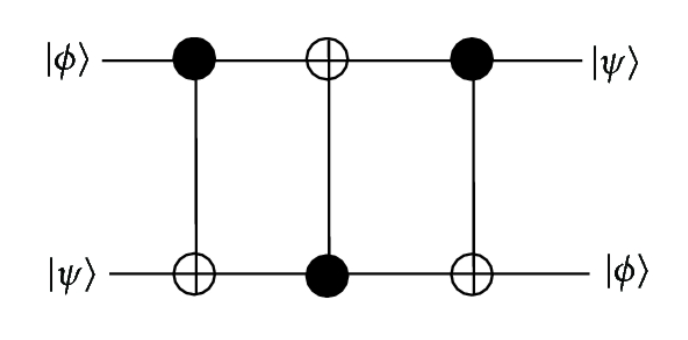
</div>

This method can be used to construct a generalised SWAP gate i.e. it can swap the states of non-adjacent qubits

#### Controlled SWAP Gate:

A controlled SWAP gate, also called Fredkin gate, swaps the state of two qubits only when the state of the control qubit is 1. It can be constructed by using CCX gates instead of CX gates in the circuit shown above.

The simulator supports SWAP and CSWAP(for c control qubits) gates

In [17]:
def SWAP(q,target):
    
        """
        The function returns a SWAP/CSWAP unitary gate matrix to be applied to the circuit
        Arguments: Number of qubits, list of index of control and target qubits

        To add a SWAP and apply on the nth and mth qubit: { "gate": "SWAP", target": [n, m] }
        To add a CSWAP and apply on the nth and mth qubit with c as control: { "gate": "CSWAP", target": [c, n, m] }
        
        """
        
        x = X()
        n = target[len(target)-1]
        t = target[0:len(target)-1]
        t.insert(len(t)-2,n)
        
        operator = get_operator(q,x,target,1)
        operator = np.matmul(get_operator(q,x,t,1),operator)
        operator = np.matmul(get_operator(q,x,target,1),operator)
        
        return operator


In [18]:
# Example: SWAP Gate
n = 3
q = initialize(n,[0,1,0,0,0,0,0,0])   # initial state = |001>

# Application of SWAP on qubit 1 and qubit 2
target = [1,2]

operator = SWAP(n,target)
q_final = np.dot(operator,q)

print("\nState after applying SWAP:\n",q_final.T)


# Application of SWAP on qubit 1 and qubit 2 with qubit 0 as control
target = [0,1,2]

operator = SWAP(n,target)
q_final = np.dot(operator,q)

print("\nState after applying CSWAP:\n",q_final.T)



State after applying SWAP:
 [[0. 0. 1. 0. 0. 0. 0. 0.]]

State after applying CSWAP:
 [[0. 1. 0. 0. 0. 0. 0. 0.]]


### Step 4: Measurement:

After finishing all the computations, we can obtain any result from our quantum state vector only through measurement. After measurement, the state vector collapses to one of the orthogonal basis of the basis it is being measured in. This would result in the destruction of the quantum state as the state will lose its superpostion state. Subsequent measurements will give the same value as measured before.

Measurement of state is probabilistic and this probability depends on the coefficient of each state. Probability of measuring an orthognal state $|n\rangle$ from state $|\psi\rangle$ is:

$$
P = |\langle\psi|n\rangle|^2 = (c_{n})^* c_{n}
$$

**For example:**

Let us consider a state:

$$
|\psi\rangle = \frac{1}{\sqrt2}(|00\rangle +|11\rangle)
$$

The probability of measuring the state $|00\rangle$ in the computational basis(z) is:

$$
P = |\langle\psi|00\rangle|^2 = \frac{1}{\sqrt 2} * \frac{1}{\sqrt 2}=\frac{1}{2}
$$

This would be same for $|11\rangle$ as it has the same coefficient as $|00\rangle$

The simulator supports measurement in the x, y and z basis of any number of qubits (default: measures all qubits). It also allows plotting of the acquired counts



In [19]:
def measure_all(state):
    
        """
        The function chooses an element from the state according to its probability of measurement 
        using weighted random technique and returns its index
        Arguments: State of the system

        """

        prob = state.copy()
        
        prob = np.square(prob)
        prob = np.abs(prob)
        n = random.random()

        for i in range(1,len(prob)):

            if n<prob[i-1]:

                return i-1

            prob[i]=prob[i]+prob[i-1]

        return len(prob)-1


def get_counts(state, num_of_shots, basis='z', measure = 0):
    
        """
        The function returns the number of times each orthogonal base gets measured
        when the state is measure num_of_shots times in the given basis
        Arguments: State of the qubit, number of shots for measurement, basis of measurement, 
                   indices of qubits to be measured(list)
        
        Default: If no basis is provided then measurement is done in the z basis
                 If no measurement list is provided, all the qubits in the system are measured

        Statisics are not returned for those states which are not measured even once

        """        
        
        q = int(math.log(len(state),2))
        
        if measure == 0:
            
            measure = range(q)
        
        # Updating state according to measurement list
        f = state.copy()
        f = np.square(f)
        f = np.abs(f)
        state = np.zeros(2**len(measure))

        for i in range(len(f)):

            element = orthogonal_state(i, len(f))
            index = 0

            for j in range(len(measure)):

                index = index + int(element[measure[j]])*2**(len(measure)-1-j)

            state[index] = state[index] + f[i]

        state = np.sqrt(state)
        
        # Measurement according to weighted random technique
        q = int(math.log(len(state),2))
        
        if basis == 'x':
            
            h = Ha()
            op = get_operator(q,h,range(q))
            state = np.dot(op,state)
            
        elif basis == 'y':
            
            h = Ha()
            sd = Sdag()
            hs = np.matmul(h,sd)
            op = get_operator(q,hs,range(q))
            state = np.dot(op,state)
            

        shots = np.zeros(len(state))

        for i in range(num_of_shots):

            index = measure_all(state)
            shots[index] = shots[index]+1

        measured_shots = {}

        for i in range(len(shots)):

            if(shots[i])!=0:

                element = orthogonal_state(i, len(state))
                
                if basis=='x':
                    
                    element = element.replace('0','+')
                    element = element.replace('1','-')
                    
                if basis=='y':
                    
                    element = element.replace('0','p')
                    element = element.replace('1','n')
                    
                    
                measured_shots[element] = int(shots[i])

        return measured_shots
    
        

def plot_counts(counts):
    
        """
        The function returns a plot of orthogonal state vs counts 
        Arguments: Number of counts for each element (dict)
        
        """

        plt.bar(range(len(counts)), list(counts.values()), align='center')
        plt.xticks(range(len(counts)), list(counts.keys()))

        plt.show()

After measurement in the z basis:
 {'00': 253, '01': 269, '10': 246, '11': 232}


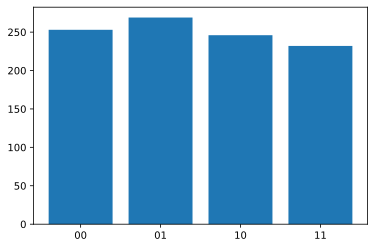

In [20]:
# Example: Measurement of state vector in computational basis
n = 2
q = initialize(n,[0.5,0.5,0.5,0.5])

# Measurement in the z basis
counts = get_counts(q,1000)

print('After measurement in the z basis:\n',counts)
plot_counts(counts)



After measurement in the x basis:
 {'++': 1000}


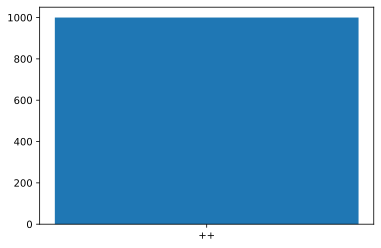

In [21]:
# Example: Measurement of state vector in a different basis
n = 2
q = initialize(n,[0.5,0.5,0.5,0.5])

# Measurement in the x basis
counts = get_counts(q,1000,'x')

print('\nAfter measurement in the x basis:\n',counts)
plot_counts(counts)

### Step 5: Running  and visualizing the circuit:

Here, we implement the method which brings together all the different processes involved in the evolution of a state vector. The method reads the circuit, compiles different methods and subsequently executes the provided circuit.

In [22]:
def run_program(state, circuit, global_params = 0):
        
        """
        The function applies the gates mentioned in circuit on the original state and
        returns the modified state vector
        Arguments: State of the qubit, set of gates and target index to be applied on the qubit
        
        """
        q = int(math.log(len(state),2))
        
        for i in range(len(circuit)):
            
            c=0
            r=0
            s=0
            gate = circuit[i]["gate"]
            target = circuit[i]["target"]
            
            if gate[0]=='C':                
                
                c = 1
                gate = gate.replace('C','')
                
            if gate[0]=='R' or gate[0]=='U':
                
                r = 1
                params = circuit[i]["params"]
                
            if gate=='SWAP':
                
                s = 1
                
            x = globals().copy()
            x.update(locals())
            gate = x.get(gate)
            
            if s:
                
                final_operator = gate(q,target)
                
            else:
                
                if r:

                    params = global_params_sub(params, global_params)                
                    operator = gate(params)

                else:

                    operator = gate()

                
                    
                final_operator = get_operator(q,operator,target,c) 
                
            state = np.dot(final_operator,state)
            
        return state
            


An important feature of the simulator which makes it more interactive and easier to use is visualization of the circuit. We could see which gate is applied on which qubit in a compact manner. Any mistake in the circuit can be rectified more efficiently with the help of visualization.

In [23]:
def visualize(n,circuit):
        
        """
        Prints the model of the circuit and represents which gate is applied on which qubit in the left to right notation
        Arguments: Number of qubits, circuit(list)
        
        """
        
        a = []
        index = 0 
        
        # Initialization of circuit visualization matrix
        for i in range(n):

            a.append(["----"])
            a.append(["    "])
            a.append(["    "])

        for i in circuit:

            gate = i["gate"]
            target = i["target"]
            index = 0

            if "SWAP" in gate:

                if gate[0]=='C':

                    targetc = target[0:len(target)-2]

                    for i in range(n):

                        if(i==targetc[index]):

                            a[3*i].append("C----")
                            a[3*i+1].append("|    ")
                            a[3*i+2].append("|    ")
                            index = index + 1

                            if index == len(targetc):

                                index = 0
                                
                        elif i<target[len(target)-2] and i>np.max(targetc):
                    
                            a[3*i].append("|----")
                            a[3*i+1].append("|    ")
                            a[3*i+2].append("|    ")

                gate = gate.replace("C","")

                for i in range(n):

                    if(i==target[len(target)-2]):

                        a[3*i].append("x----")
                        a[3*i+1].append("|    ")
                        a[3*i+2].append("|    ")
                        
                    elif i>target[len(target)-2] and i<target[len(target)-1]:
                    
                            a[3*i].append("|----")
                            a[3*i+1].append("|    ")
                            a[3*i+2].append("|    ")

                    elif(i==target[len(target)-1]):

                        a[3*i].append("x----")
                        a[3*i+1].append("     ")
                        a[3*i+2].append("     ")


                    elif i not in target and i>target[len(target)-2] or i<np.min(targetc):

                        a[3*i].append("-----")
                        a[3*i+1].append("     ")
                        a[3*i+2].append("     ")


            else:

                if gate[0]=='C':

                    targetc = target[0:len(target)-1]

                    for i in range(n):

                        if(i==targetc[index]):

                            a[3*i].append("C----")
                            a[3*i+1].append("|    ")
                            a[3*i+2].append("|    ")
                            index = index + 1

                            if index == len(targetc):

                                index = 0
                                
                        elif i<target[len(target)-1] and i>np.max(targetc):
                    
                            a[3*i].append("|----")
                            a[3*i+1].append("|    ")
                            a[3*i+2].append("|    ")

                    gate = gate.replace("C","")

                    for i in range(n):

                        if(i==target[len(target)-1]):

                            l = len(gate)
                            a[3*i].append(gate+"-"*(5-l))
                            a[3*i+1].append("     ")
                            a[3*i+2].append("     ")


                        elif i not in target and i>target[len(target)-1] or i<np.min(targetc):

                            a[3*i].append("-----")
                            a[3*i+1].append("     ")
                            a[3*i+2].append("     ")

                else:

                    for i in range(n):

                        if(i==target[index]):

                            l = len(gate)
                            a[3*i].append(gate+"-"*(5-l))
                            a[3*i+1].append("     ")
                            a[3*i+2].append("     ")
                            index = index + 1

                            if index == len(target):

                                index = 0
                        else:

                            a[3*i].append("-----")
                            a[3*i+1].append("     ")
                            a[3*i+2].append("     ")
                            
        print("Circuit Diagram:\n")

        for i in a:
            for j in range(len(i)):
                 print(i[j], end = "")
            print()

            

In [35]:
# Circuit to produce Bell state

circuit = [
{ "gate": "Ha", "target": [0] },
{ "gate": "CX", "target": [0, 1] }
]

n = 2
shots = 100
q = initialize(n)

visualize(n,circuit)

Circuit Diagram:

----Ha---C----
         |    
         |    
---------X----
              
              


Measurement of Bell State:
 {'00': 49, '11': 51}


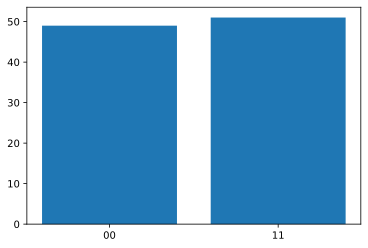

In [36]:
q_final = run_program(q,circuit)

counts = get_counts(q_final,shots)
print("Measurement of Bell State:\n",counts)

plot_counts(counts)

### Step 6: Examples of important algorithms:

We will now implement some important algorithms in quantum computing like the Deutch Jozsa algorithm, Grover's algorithm and the Variational Quantum Eigensolver algorithm

#### Deutch Jozsa Algorithm:

The algorithm computes the value of a binary function for n qubits simultaneously and thus shows quantum advantage. If the function is constant we get the state |000...n times> with a probability of 1. If the function is balanced the probability of measurement of |000...n times> is 0.

In [26]:
def oracle(q):
    
        """
        The function returns the deutch jozsa circuit with a balanced oracle
        Arguments: Number of qubits for which the function needs to be calculated
        
        """
        
        circuit = [
            {"gate": "X", "target": [q]},
            {"gate": "Ha", "target": range(q+1)},
            {"gate": "X", "target": range(0,q,2)}    
        ]
        
        for i in range(q):
            
            circuit.append({"gate": "CX", "target": [i,q]})
            
        circuit.append({"gate": "X", "target": range(0,q,2)})
        circuit.append({"gate": "Ha", "target": range(n+1)})
        
        return circuit
        
# Implementing Deutch Algorithm for 3 qubits for a balanced oracle

n = 3
shots = 100
q = initialize(n+1)

circuit = oracle(n)

visualize(n+1,circuit)           


Circuit Diagram:

---------Ha---X----C--------------X----Ha---
                   |                        
                   |                        
---------Ha--------|----C--------------Ha---
                   |    |                   
                   |    |                   
---------Ha---X----|----|----C----X----Ha---
                   |    |    |              
                   |    |    |              
----X----Ha--------X----X----X---------Ha---
                                            
                                            


Counts after applying Deutsch Jozsa Algorithm:
 {'111': 100}


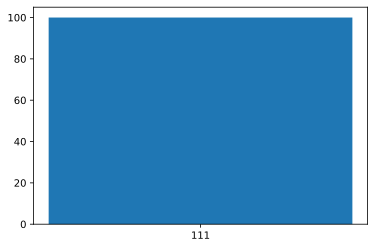

In [27]:
q_final = run_program(q,circuit)

counts = get_counts(q_final,shots,measure = range(n))
print("Counts after applying Deutsch Jozsa Algorithm:\n",counts)

plot_counts(counts)

As we can see, the resut in not $|000\rangle$, implying that the oracle was indeed a balanced one.

#### Grover's Algorithm:

Grover's algorithm is a quantum search algorithm which amplifies the probability of a particular winner state. First, we will implement a simple Grover's Algorithm on qubits to find the $|11\rangle$ state

In [28]:
# Implementing Grover's Algorithm for 2 qubits
# Winner state = state |11>

circuit = [
  { "gate": "Ha", "target": [0, 1] }, 
  { "gate": "CZ", "target": [0, 1] },
  { "gate": "Ha", "target": [0, 1] },
  { "gate": "Z", "target": [0, 1] },  
  { "gate": "CZ", "target": [0, 1] },
  { "gate": "Ha", "target": [0, 1] }
]


n = 2
shots = 100
q = initialize(n)

visualize(n,circuit)

Circuit Diagram:

----Ha---C----Ha---Z----C----Ha---
         |              |         
         |              |         
----Ha---Z----Ha---Z----Z----Ha---
                                  
                                  


Counts after applying Grover's Algorithm
 {'11': 100}


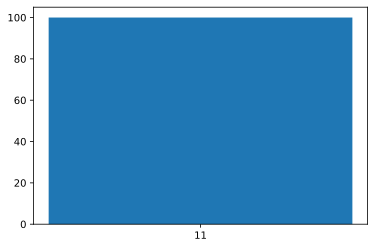

In [29]:
q_final = run_program(q,circuit)

counts = get_counts(q_final,shots)
print("Counts after applying Grover's Algorithm\n",counts)

plot_counts(counts)

As we can see, the probability of the winner state $|11\rangle$ has been amplified to 1. The number of grover iterations is dependent of the number of qubits that we use. The complexity of Grover's algorithm is $O(\sqrt N)$ where N is the number of orthogonal basis of the state.

Now, we will implement the Grover's Algorithm on a system of three qubits with custom winner states:

In [30]:
def grover(q,winner):
    
        """
        The function computes and returns the circuit which will apply Grover's algorithm on q qubits 
        and find out the winner states
        Arguments: Number of qubits, list of winner states

        """
        x = "X"
        for i in range(q):

            x = "C"+x


        for i in range(len(winner)):

            winner[i] = orthogonal_state(winner[i], 2**q)
        

        circuit1 = [
            {"gate": "X", "target": [q]},
            {"gate": "Ha", "target": range(q+1)}
        ]

        for i in winner:

            for j in range(len(i)):

                if i[j]=='0':

                    circuit1.append({"gate": "X", "target": [j]})

            circuit1.append({"gate": x, "target": range(q+1)})

            for j in range(len(i)):

                if i[j]=='0':

                    circuit1.append({"gate": "X", "target": [j]})


        circuit2 = [
            {"gate": "Ha", "target": range(q+1)},
            {"gate": "X", "target": range(q)},
            {"gate": "Ha", "target": [q-1]},
            {"gate": x[1:len(x)], "target": range(q)},
            {"gate": "Ha", "target": [q-1]},
            {"gate": "X", "target": range(q)},
            {"gate": "Ha", "target": range(q)}            
        ]
        
        circuit = circuit1 + circuit2
        return circuit
    
    

# Implementing Grover's Algorithm for 3 qubits
# Winner state = state 3 and state 5

n = 3
oracle = 1
winner = [3, 5]

shots = 1000

q = initialize(n+oracle)
circuit = grover(n,winner)

visualize(n+oracle, circuit)
         
            

Circuit Diagram:

---------Ha---X----C----X---------C---------Ha---X---------C---------X----Ha---
                   |              |                        |                   
                   |              |                        |                   
---------Ha--------C---------X----C----X----Ha---X---------C---------X----Ha---
                   |              |                        |                   
                   |              |                        |                   
---------Ha--------C--------------C---------Ha---X----Ha---X----Ha---X----Ha---
                   |              |                                            
                   |              |                                            
----X----Ha--------X--------------X---------Ha---------------------------------
                                                                               
                                                                               


Counts after applying Grover's Algorithm
 {'011': 502, '101': 498}


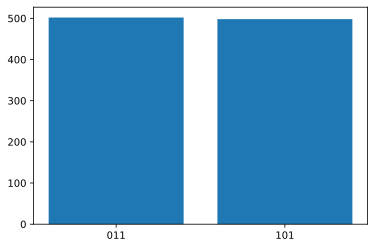

In [31]:
q_final = run_program(q,circuit)

counts = get_counts(q_final,shots, measure=range(n))
print("Counts after applying Grover's Algorithm\n",counts)

plot_counts(counts)   

As we can see, the probability of measurement is the highest for state 3 and state 5.

**Variational Quantum Eigensolver:**

Variational Quantum Eigensolver or VQE is a variational algorithm used to compute the smallest eigenvalue of the hamiltonian H of a system. It involves using an ansatz(a variational circuit) which is applied a number of times with varying paramters on our intial qubits to find our desired result. These varying paramters are calculated by an optimizer.

In our example, we will find the lowest eigen value of a **4 x 4 hamiltonian** by using a VQE like algorithm.

In [32]:
def unitary_operator():
    
        """
        The function computes and returns the Pauli-matrices XX, YY, ZZ and II. 
        These will be used to decompose a Hamiltoniian matrix to these 4 basis matrices.

        """
        
        x = X()
        xx = get_operator(2,x,[0,1])
        
        y = Y()
        yy = np.real(get_operator(2,y,[0,1]))
        
        z = Z()
        zz = get_operator(2,z,[0,1])
        
        i = I()
        ii = get_operator(2,i,[0,1])
        
        return [xx,yy,zz,ii]

    
def decompose(H):
    
        """
        The function computes and returns the coefficients of the Pauli matrices when the matrix H is decomposed
        into the Pauli basis.
        Arguments: Hamiltonian matrix H
        
        """
        
        t = []
        operator = unitary_operator()

        for i in operator:
            t.append(0.25*(np.dot(i.conjugate().transpose(),H)).trace())
            
        return t
    
    
def ansatz():
    
        """
        The function returns the variational circuit which will be used to produce the state
        with the lowest expectation value by varying its parameters
        
        """
        
        circuit = [
            {"gate": "Ha", "target": [0]},
            {"gate": "CX", "target": [0, 1]},
            {"gate": "RX", "params": {"theta": "global_1"}, "target": [0]},
            {"gate": "RY", "params": {"theta": "global_2"}, "target": [1]}
        ]
        
        return circuit
    
        
def optimizer(objective_func, params, additional_params = None):
    
        """
        The function computes and returns the parameters of the ansatz which will produce a state
        with the lowest expectation value
        Arguments: The objective function, initial guess of paramters(list), fixed paramters(tuple)
        
        """
        
        minimum = minimize(objective_function, params, additional_params, method="Powell", tol=1e-6)
        
        return minimum.x
    
def objective_function(p, state, t):
    
        """
        The function computes and returns the expectation value of the Hamiltonian with respect
        to our calculated state with the current params p.
        Arguments: Variational Parameters p, initial state, coefficient of the Pauli matrices
        
        """
        shots = 1000
        circuit = ansatz()
        
        global_params = {"global_1": p[0], "global_2": p[1]}
        state = run_program(state,circuit,global_params)
        
        z_count = get_counts(state,shots)
        x_count = get_counts(state,shots,'x')
        y_count = get_counts(state,shots,'y')
        
        counts = 0
        E = 0
    
        for key,value in z_count.items():
            
            counts = counts + (-1)**(int(key[0])+int(key[1]))*value
        
        E = E + t[2]*counts
                
        counts = 0
        
        for key,value in x_count.items():
                
            key = key.replace('+','0')
            key = key.replace('-','1')
            counts = counts + (-1)**(int(key[0])+int(key[1]))*value
        
        E = E + t[0]*counts
        
        counts = 0
        
        for key,value in y_count.items():
                
            key = key.replace('p','0')
            key = key.replace('n','1')
            counts = counts + (-1)**(int(key[0])+int(key[1]))*value
        
        E = E + t[1]*counts
        E = E/shots
        E = E + t[3]
        
        return E
        


# Using VQE to find the lowest eigenvalue of H

H = np.array([[1,0,0,-1],[0,0,-1,0],[0,-1,0,0],[1,0,0,1]])

t = decompose(H)
n = 2
q = initialize(n)

initial_global_1 = random.random()
initial_global_2 = random.random()

p = [initial_global_1, initial_global_2]

visualize(n,ansatz())

angle = optimizer(objective_function, p, (q,t))

value = objective_function(angle,q,t)
c = np.min(np.linalg.eigvals(H))

print("Minimum Eigenvalue of H using numpy:\n",c)
print("\nMinimum Eigenvalue of H using VQE:\n",value)
print("\nCalculated paramters:",angle)

Circuit Diagram:

----Ha---C----RX--------
         |              
         |              
---------X---------RY---
                        
                        
Minimum Eigenvalue of H using numpy:
 (-1+0j)

Minimum Eigenvalue of H using VQE:
 -1.0

Calculated paramters: [ 3.12568192 -0.04725055]


Here we can see, that the minimum eigen value obtained by an in-built method and our VQE function are the same. 

The trick to find the desired answer depends on the choice of the ansatz. To find the minimum eigenvalue of a randomly generated hamiltonian would require a more complicated ansatz which has higher entanglement and higher optimization potential.


### Swap Test:

The Swap test is a method in quantum computation which is used to find the degree by which two quantum states differ. If the two states $\phi$ and $\psi$ are orthogonal then the probability of measurement of 0 is $\frac{1}{2}$. If the two states are equal then the probability of measurement of 0 is 1.

In [33]:
def swap_test(phi,psi):
    
        """
        The function computes and returns the counts after the SWAP test has been applied.
        Arguments: State 1 phi, State 2 psi
        
        """
        
        q = initialize(1)
        q = np.kron(q,phi)
        state = np.kron(q,psi)
        shots = 100
        
        circuit = [
            {"gate": "Ha", "target": [0]},
            {"gate": "CSWAP", "target": [0,1,2]},
            {"gate": "Ha", "target": [0]}            
        ]
        
        visualize(3,circuit)
        state = run_program(state, circuit)
        
        counts = get_counts(state, shots, measure=[0])
        
        return counts
    
    
phi = initialize(1,[0,1])    # state = |1>
psi = initialize(1,[1,0])    # state = |0>

counts = swap_test(phi,psi)  

Circuit Diagram:

----Ha---C----Ha---
         |         
         |         
---------x---------
         |         
         |         
---------x---------
                   
                   


Counts after SWAP Test:
 {'0': 49, '1': 51}


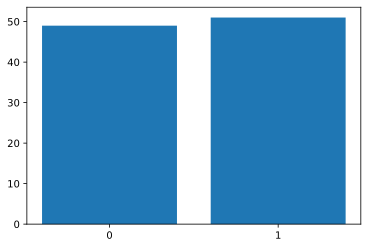

In [34]:
print("Counts after SWAP Test:\n",counts)

plot_counts(counts)

As we can see, the probability of measuring the state $|0\rangle$ is ~ 50% for two orthogonal states $|1\rangle$ and $|0\rangle$ thus verifying the SWAP test.